In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import metpy
import cartopy.crs as ccrs
import glob
import geopandas as gpd

from model_collection import ModelCollection

#https://stackoverflow.com/a/64823806/5217293
import joblib

from tqdm.notebook import tqdm

from IPython.display import HTML, display
from matplotlib import animation
import cartopy.feature as cfeature
import matplotlib 
import matplotlib.cm as cm
import string
matplotlib.rcParams['animation.embed_limit'] = 2**128

save_path = '/Users/kyle/GoogleDrive/College/Graduate/Thesis/Figures and Data/tuned_models'

In [4]:
mc = ModelCollection.__new__(ModelCollection)

In [5]:
mc.load('data/model_runs/tuned-trained-all_years_months.pcl')

# Predicting the Gridded Dataset

In [52]:
files = sorted(glob.glob(f'/Volumes/Shores/matched/*.nc'))

In [53]:
with xr.open_dataset(files[0]) as aod:
    aod.load()

In [ ]:
geo = aod.metpy.parse_cf('AOD').metpy.cartopy_crs

In [67]:
plate = ccrs.PlateCarree()
equal_area = ccrs.AlbersEqualArea(central_latitude=39.8283, central_longitude=-98.5795)

In [ ]:
for file in tqdm(files):
    with xr.open_dataset(file) as day:
        day.load()
    
    if 'Linear Regression' in day.data_vars:
        continue

    df = day.to_dataframe().drop(['goes_imager_projection'], axis=1).dropna().reset_index()

    df['month'] = df.t.dt.month
    df.month = df.month.astype('category')

    transformed = plate.transform_points(src_crs=geo, x=df['x'], y=df['y'])
    df['longitude'] = transformed[:,0]
    df['latitude'] = transformed[:,1]

    df = pd.get_dummies(df[df.columns.tolist()])

    for a in X.columns.difference(df.columns.tolist()):
        df[a] = np.full_like(df['AOD'], fill_value=0)

    x, y = df.x, df.y
    df = df.drop(df.columns.difference(X.columns.tolist()), axis=1)[X.columns.tolist()].reset_index(drop=True)

    prediction_dataset = df.to_numpy(dtype='float', na_value=np.nan)
    preds = mc.predict(prediction_dataset)

    for model in preds.keys():
        day[model] = xr.full_like(day.AOD, fill_value=np.nan)

    for idx, (i, j) in tqdm(enumerate(zip(x, y)), total=len(x)):
        day['Linear Regression'].loc[dict(x=i, y=j)] = preds['Linear Regression'][idx]
        day['Polynomial'].loc[dict(x=i, y=j)] = preds['Polynomial'][idx]
        day['Bayesian Ridge'].loc[dict(x=i, y=j)] = preds['Bayesian Ridge'][idx]
        day['MLP'].loc[dict(x=i, y=j)] = preds['MLP'][idx]
        day['Random Forest'].loc[dict(x=i, y=j)] = preds['Random Forest'][idx]
        day['Extra Trees'].loc[dict(x=i, y=j)] = preds['Extra Trees'][idx]
        day['XGBoost'].loc[dict(x=i, y=j)] = preds['XGBoost'][idx]

    attrs = {'long_name': 'Predicted PM2.5 Value', 'units': 'micrograms per cubic meter'}

    day['Linear Regression'].attrs = attrs
    day['Polynomial'].attrs = attrs
    day['Bayesian Ridge'].attrs = attrs
    day['MLP'].attrs = attrs
    day['Random Forest'].attrs = attrs
    day['Extra Trees'].attrs = attrs
    day['XGBoost'].attrs = attrs

    day.to_netcdf(file)

In [121]:
models = ['Bayesian Ridge', 'MLP', 'XGBoost']

for file in tqdm(files[311+27:]):
    with xr.open_dataset(file) as day:
        day.load()

    df = day.to_dataframe().drop(['goes_imager_projection'], axis=1).dropna().reset_index()

    df['month'] = df.t.dt.month
    df.month = df.month.astype('category')

    transformed = plate.transform_points(src_crs=geo, x=df['x'], y=df['y'])
    df['longitude'] = transformed[:,0]
    df['latitude'] = transformed[:,1]

    df = pd.get_dummies(df[df.columns.tolist()])

    for a in X.columns.difference(df.columns.tolist()):
        df[a] = np.full_like(df['AOD'], fill_value=0)

    x, y = df.x, df.y
    df = df.drop(df.columns.difference(X.columns.tolist()), axis=1)[X.columns.tolist()].reset_index(drop=True)

    prediction_dataset = df.to_numpy(dtype='float', na_value=np.nan)
    preds = mc.predict(prediction_dataset)

    for model in models:
        day[model] = xr.full_like(day.AOD, fill_value=np.nan)

    for idx, (i, j) in tqdm(enumerate(zip(x, y)), total=len(x)):
        day['Bayesian Ridge'].loc[dict(x=i, y=j)] = preds['Bayesian Ridge'][idx]
        day['MLP'].loc[dict(x=i, y=j)] = preds['MLP'][idx]
        day['XGBoost'].loc[dict(x=i, y=j)] = preds['XGBoost'][idx]

    day.to_netcdf(file)

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/444820 [00:00<?, ?it/s]

  0%|          | 0/435184 [00:00<?, ?it/s]

  0%|          | 0/342847 [00:00<?, ?it/s]

  0%|          | 0/459273 [00:00<?, ?it/s]

  0%|          | 0/358653 [00:00<?, ?it/s]

  0%|          | 0/272224 [00:00<?, ?it/s]

  0%|          | 0/318133 [00:00<?, ?it/s]

  0%|          | 0/639502 [00:00<?, ?it/s]

  0%|          | 0/597094 [00:00<?, ?it/s]

  0%|          | 0/452035 [00:00<?, ?it/s]

  0%|          | 0/345881 [00:00<?, ?it/s]

  0%|          | 0/454007 [00:00<?, ?it/s]

  0%|          | 0/269651 [00:00<?, ?it/s]

  0%|          | 0/277686 [00:00<?, ?it/s]

  0%|          | 0/398303 [00:00<?, ?it/s]

  0%|          | 0/500542 [00:00<?, ?it/s]

  0%|          | 0/409021 [00:00<?, ?it/s]

  0%|          | 0/593809 [00:00<?, ?it/s]

  0%|          | 0/455782 [00:00<?, ?it/s]

  0%|          | 0/387865 [00:00<?, ?it/s]

  0%|          | 0/413312 [00:00<?, ?it/s]

  0%|          | 0/385958 [00:00<?, ?it/s]

  0%|          | 0/228078 [00:00<?, ?it/s]

  0%|          | 0/326672 [00:00<?, ?it/s]

  0%|          | 0/309820 [00:00<?, ?it/s]

  0%|          | 0/286639 [00:00<?, ?it/s]

  0%|          | 0/188952 [00:00<?, ?it/s]

# Mapping Gridded Dataset Predictions

In [4]:
models = ['Linear Regression','Polynomial','Bayesian Ridge','MLP','Random Forest','Extra Trees','XGBoost']

In [2]:
ds = xr.open_mfdataset(
    '/Volumes/Shores/matched/*.nc',
)

In [3]:
with xr.open_dataset('/Volumes/Shores/matched/001.nc') as one:
    one.load()
    
# with xr.open_dataset('/Users/kyle/Downloads/OR_ABI-L2-AODC-M6_G16_s20210411801068_e20210411803441_c20210411806227.nc') as one:
#     one.load()

proj = one.metpy.parse_cf('AOD').metpy.cartopy_crs
plate = ccrs.PlateCarree()
equal_area = ccrs.AlbersEqualArea(central_latitude=39.8283, central_longitude=-98.5795)

In [125]:
ds = ds[models]

In [4]:
def set_extent(ax, extents):
    minlon, maxlon = extents['minlon'], extents['maxlon']
    minlat, maxlat = extents['minlat'], extents['maxlat']
    ax.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())
    
def add_ring(ax, extents):
    minlon, maxlon = extents['minlon'], extents['maxlon']
    minlat, maxlat = extents['minlat'], extents['maxlat']
    nvert = 100
    ring_lons = np.r_[np.linspace(minlon, minlon, nvert),
                 np.linspace(minlon, maxlon, nvert),
                 np.linspace(maxlon, maxlon, nvert)].tolist()
    ring_lats = np.r_[np.linspace(minlat, maxlat, nvert),
                 np.linspace(maxlat, maxlat, nvert),
                 np.linspace(maxlat, minlat, nvert)].tolist()

    ring = LinearRing(list(zip(ring_lons, ring_lats)))
    ax.add_geometries([ring], ccrs.PlateCarree(),
                       facecolor='none', edgecolor='red', linewidth=0.4)

def plot_cities(ax, extents, places=None, dx=0.05, dy=0.05, fontsize=8, show_population=False, markersize=5, alpha=1, color='red'):
    minlon, maxlon = extents['minlon'], extents['maxlon']
    minlat, maxlat = extents['minlat'], extents['maxlat']
    if places is None:
        places = gpd.read_file('data/Natural_Earth_quick_start/110m_cultural/ne_110m_populated_places.shp')
    sub = places[
        (places.geometry.x > minlon) & 
        (places.geometry.x < maxlon) &
        (places.geometry.y > minlat) &
        (places.geometry.y < maxlat)
    ]
    sub.plot(markersize=markersize, ax=ax, transform=plate, color=color, alpha=alpha)
    for x, y, label, pop in zip(sub.geometry.x, sub.geometry.y, sub.NAME, sub.POP_MAX):
        if show_population:
            label = f'{label}, {pop:,} people'
        ax.text(x=x+dx, y=y+dy, s=label, transform=plate, fontsize=fontsize)
        
def plot_roads(ax, extents, roads=None):
    minlon, maxlon = extents['minlon'], extents['maxlon']
    minlat, maxlat = extents['minlat'], extents['maxlat']
    if roads is None:
        roads = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_roads.shp')
    roads.plot(ax=ax, transform=plate, color='black', lw=0.1)
    
def read(file):
    df = pd.read_csv(file, parse_dates=['Date Local'])

    df.rename(columns = {
        'Date Local':'time', 
        'Arithmetic Mean': 'value',
        'Latitude': 'latitude',
        'Longitude': 'longitude'
    }, inplace = True)

    keep = ['latitude', 'longitude', 'time', 'value','Local Site Name', 'Address', 'State Name', 'County Name','City Name', 'POC']
    df.drop(columns=df.columns.difference(keep),inplace=True)

    df = df.loc[df.value >= 0]
    
    return df

In [5]:
extents = {
    'US': {
        'minlat': 25,
        'maxlat': 49,
        'minlon': -120,
        'maxlon': -73
    },
    'Houston': {
        'minlat': 29.3,
        'maxlat': 30.08910587,
        'minlon': -95.81349756,
        'maxlon': -94.73398897
    },
    'LA' : {
        'minlat': 33.5,
        'maxlat': 34.2152144,
        'minlon': -117.8,
        'maxlon': -116.7522488
    },
    'Pittsburgh': {
        'minlat': 40.14211,
        'maxlat': 40.62940,
        'minlon': -80.29827,
        'maxlon': -79.46404
    },
    'Nebraska': {
        'minlat': 40.000102,
        'maxlat': 43.00037,
        'minlon': -104.053729,
        'maxlon': -95.317255
    },
    'Fargo': {
        'minlat': 46.35421,
        'maxlat': 47.34895,
        'minlon': -97.33842,
        'maxlon': -95.75006
    }
}

### Yearly Mean

In [126]:
yearly_mean = ds.resample(t='1Y').mean().compute()

In [70]:
yearly_mean['goes_imager_projection'] = one.goes_imager_projection

In [75]:
mapping = {'grid_mapping' : 'goes_imager_projection'}
yearly_mean['Linear Regression'].attrs = mapping
yearly_mean['Polynomial'].attrs = mapping
yearly_mean['Bayesian Ridge'].attrs = mapping
yearly_mean['MLP'].attrs = mapping
yearly_mean['Extra Trees'].attrs = mapping
yearly_mean['Random Forest'].attrs = mapping
yearly_mean['XGBoost'].attrs = mapping

In [187]:
yearly_mean = yearly_mean.drop_vars(['y_image','x_image','sunglint_angle','retrieval_local_zenith_angle','quantitative_local_zenith_angle','retrieval_solar_zenith_angle','quantitative_solar_zenith_angle','aod_product_wavelength'])

In [189]:
yearly_mean.to_netcdf(f'{save_path}/yearly_mean.nc')

In [82]:
proj = yearly_mean.metpy.parse_cf('Extra Trees').metpy.cartopy_crs
plate = ccrs.PlateCarree()
equal_area = ccrs.AlbersEqualArea(central_latitude=39.8283, central_longitude=-98.5795)

In [22]:
with xr.open_dataset(f'{save_path}/yearly_mean.nc') as yearly_mean:
    yearly_mean.load()

In [23]:
df = yearly_mean.to_dataframe().reset_index().dropna().drop(['t', 'y', 'x', 'goes_imager_projection'], axis=1)
vmin, vmax = df.quantile(0.01).min(), df.quantile(0.99).max()

In [ ]:
fig, axes = plt.subplots(3, 3, dpi=300, subplot_kw=dict(projection=equal_area))

axs = iter(axes.ravel())

for c in models:
    ax = next(axs)
    
    if c == 'MLP':
        ax.set_visible(False)
        ax = next(axs)
    
    a = yearly_mean[c].plot(ax=ax, transform=proj, 
                       vmin=4, 
                       vmax=12, 
                       add_colorbar=False)
    ax.coastlines()
    set_extent(ax, extents['US'])
    ax.set_title(c)
    ax.add_feature(cfeature.STATES, alpha=0.4)
    ax.spines[:].set_visible(False)
    
    ax.gridlines(alpha=0.2)
    
    if c == 'MLP':
        ax = next(axs)
        ax.set_visible(False)

fig.tight_layout()
cbar = fig.colorbar(a, ax=axes.ravel().tolist(), extend='both')
cbar.set_label('$\mu g / m^3$')
cbar.outline.set_linewidth(0)

for ax in axs:
    ax.set_visible(False)

fig.suptitle('Annual Averaged Predictions', y=1.01)
fig.savefig(f'{save_path}/annual-averages.png', format='png', bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(3, 1, 
    figsize=(6.5,7),
#     figsize=set_size(345, subplots=(3,1)), 
    dpi=137, 
    subplot_kw=dict(projection=equal_area))

axs = iter(axes.ravel())

for c in ['Polynomial', 'MLP', 'Extra Trees']:
    ax = next(axs)
    
    a = yearly_mean[c].plot(ax=ax, transform=proj, 
                       vmin=vmin, 
                       vmax=12, 
                       add_colorbar=False)
    ax.coastlines()
    set_extent(ax, extents['US'])
    ax.set_title(c, fontsize=6)
    ax.add_feature(cfeature.STATES, alpha=0.4)
    ax.spines[:].set_visible(False)
    ax.set_aspect(0.5)

cbar = fig.colorbar(a, 
    ax=axes.ravel().tolist(), 
    extend='both', orientation='horizontal', 
    aspect=55, pad=0.01)
cbar.set_label('$\mu g / m^3$', fontsize=6)
cbar.outline.set_linewidth(0)

# fig.tight_layout()

# fig.suptitle('Annually Averaged Predictions', y=1.01, x=.6)
fig.savefig(f'{save_path}/annual-average-best-models.png', format='png', bbox_inches = "tight")

In [ ]:
dpi=300
fig, ax = plt.subplots(
    dpi=dpi, 
#     figsize=set_size(345, subplots=(1,1)), 
    subplot_kw=dict(projection=equal_area)
)

a = yearly_mean['Extra Trees'].plot(ax=ax, transform=proj, vmin=vmin, vmax=12, add_colorbar=False)

ax.add_feature(cfeature.STATES, alpha=0.4)
ax.coastlines()
# ax.gridlines(alpha=0.3, lw=0.5)
ax.set_title('')

set_extent(ax, extents['US'])
ax.spines[:].set_visible(False)

cbar = fig.colorbar(a, ax=ax, extend='both', orientation='horizontal', aspect=60, shrink=0.6)
cbar.ax.tick_params(labelsize=6)
cbar.set_label('$\mu g / m^3$', fontsize=6)
cbar.outline.set_linewidth(0)

fig.savefig(f'{save_path}/annual-average-extra_trees.png', format='png', bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(1, 3, dpi=300, subplot_kw=dict(projection=equal_area))

axs = iter(axes.ravel())

vmin, vmax = df.quantile(0.01).min(), df.quantile(0.99).max()
for c in ['Polynomial', 'MLP', 'Extra Trees']:
    ax = next(axs)
    
    a = yearly_mean[c].plot(ax=ax, transform=proj, 
                       vmin=vmin, 
                       vmax=12, 
                       add_colorbar=False)
    ax.coastlines()
    ax.set_extent([-120, -63, 25, 50], plate)
    ax.set_title(c)
    ax.add_feature(cfeature.STATES, alpha=0.4)
    ax.spines[:].set_visible(False)
    
    ax.gridlines(alpha=0.2)
#     ax.set_aspect('auto')

fig.tight_layout()
cbar = fig.colorbar(a, ax=axes.ravel().tolist(), extend='both', orientation='horizontal', aspect=50)
cbar.set_label('$\mu g / m^3$')
cbar.outline.set_linewidth(0)

# fig.suptitle('Annually Averaged Predictions', y=.9, x=.5)
# fig.savefig(f'{save_path}/annual-average-best-models.png', format='png', bbox_inches = "tight")

### Extra Trees City Closeup

In [86]:
places = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_populated_places.shp')
roads = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_roads.shp')

In [96]:
zip_path = f'zip://data/houston_roads.zip!houston_roads/TRANSPORTATION_COMPLETE_STREETS.shp'
houston_roads = gpd.read_file(zip_path)

In [217]:
# minlon, maxlon, minlat, maxlat = -100, -90, 28, 30

brlat, brlon = 29.3,-94.73398897
tllat, tllon = 30.08910587,-95.81349756
minlon, maxlon, minlat, maxlat = tllon, brlon, brlat, tllat
sub = places[
    (places.geometry.x > minlon) & 
    (places.geometry.x < maxlon) &
    (places.geometry.y > minlat) &
    (places.geometry.y < maxlat)
]

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import InsetPosition
from shapely.geometry.polygon import LinearRing

proj = equal_area
# the zoomed in plot
fig, ax = plt.subplots(dpi=300, subplot_kw=dict(projection=proj))

# the inset plot which shows the entire US with a rectangle highlighting the region of interest
ax2 = plt.axes([0, 0, 1, 1], projection=proj)
ax2.add_feature(cfeature.STATES)

inset_x = .23
inset_y = .17
inset_size = 0.4
ip = InsetPosition(ax, [inset_x - inset_size / 2,
                        inset_y - inset_size / 2,
                        inset_size,
                        inset_size])
ax2.set_axes_locator(ip)

a = yearly_mean['Extra Trees'].plot(
        ax=ax, transform=geo, vmin=vmin, vmax=12, 
        add_colorbar=False)

cbar = fig.colorbar(a, ax=ax)
cbar.outline.set_linewidth(0)
cbar.set_label('$\mu g / m^3$')

yearly_mean['Extra Trees'].plot(
        ax=ax2, transform=geo, vmin=vmin, vmax=12, 
        add_colorbar=False)
ax2.gridlines(alpha=0.3)

for axis in [ax, ax2]:
    axis.add_feature(cfeature.STATES, alpha=0.2)
    axis.spines[:].set_visible(False)
    axis.set_title('')

nvert = 100
ring_lons = np.r_[np.linspace(minlon, minlon, nvert),
             np.linspace(minlon, maxlon, nvert),
             np.linspace(maxlon, maxlon, nvert)].tolist()
ring_lats = np.r_[np.linspace(minlat, maxlat, nvert),
             np.linspace(maxlat, maxlat, nvert),
             np.linspace(maxlat, minlat, nvert)].tolist()

ring = LinearRing(list(zip(ring_lons, ring_lats)))
ax2.add_geometries([ring], ccrs.PlateCarree(),
                   facecolor='none', edgecolor='red', linewidth=0.4)

sub.plot(markersize=2, ax=ax, transform=plate, color='red')
for x, y, label in zip(sub.geometry.x, sub.geometry.y, sub.NAME):
    ax.text(x=x, y=y, s=label, transform=plate, fontsize=10)

# roads.plot(ax=ax, transform=plate, color='black', lw=0.1)
houston_roads.plot(ax=ax, transform=plate, color='black', lw=0.05)    

ax.set_extent([minlon, maxlon, minlat, maxlat], plate)
ax2.set_extent([-100, -90, 26, 33], plate)

fig.savefig(f'{save_path}/houston-annual-average-extra-trees.png', format='png', bbox_inches = "tight")

In [26]:
places = gpd.read_file('data/Natural_Earth_quick_start/110m_cultural/ne_110m_populated_places.shp')
more_places = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_populated_places.shp')
roads = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_roads.shp')

In [27]:
pittsburgh = more_places[more_places.NAME == 'Pittsburgh']
fargo = more_places[more_places.NAME == 'Fargo']

In [ ]:
fig, axes = plt.subplots(2,2, dpi=300,
    subplot_kw=dict(projection=plate),
#     gridspec_kw=dict(wspace=-0.3, hspace=0.1),
)

(ax1, ax2, ax3, ax4) = axes.ravel()

for ax in axes.ravel():
    ax.coastlines()
    ax.gridlines(alpha=0.2)
    ax1.add_feature(cfeature.STATES, alpha=0.4)
    dat = yearly_mean['Extra Trees'].plot(
        ax=ax, transform=proj, vmin=4, vmax=12, 
        add_colorbar=False)
    ax.set_title('')
    ax.spines[:].set_visible(False)

# ax1.spines[['left', 'bottom']].set_visible(True)
    
plot_cities(ax1, extents['LA'], more_places, fontsize=8, dx=0.01, dy=0.01)
plot_cities(ax2, extents['Houston'], more_places, fontsize=8, dx=0.01, dy=0.01)
plot_cities(ax3, extents['Pittsburgh'], more_places, fontsize=8, dx=0.01, dy=0.01)
plot_cities(ax4, extents['Fargo'], fargo, fontsize=8, dx=0.01, dy=0.01)

plot_roads(ax1, extents['LA'], roads)
plot_roads(ax2, extents['Houston'], roads)
plot_roads(ax3, extents['Pittsburgh'], roads)
plot_roads(ax4, extents['Fargo'], roads)

set_extent(ax1, extents['LA'])
set_extent(ax2, extents['Houston'])
set_extent(ax3, extents['Pittsburgh'])
set_extent(ax4, extents['Fargo'])

cbar = fig.colorbar(dat, ax=axes, orientation='horizontal', aspect=50, shrink=0.6, pad=0.02, extend='both')
cbar.outline.set_linewidth(0)
cbar.set_label('$\mu g / m^3$')

# fig.tight_layout()

fig.savefig(f'{save_path}/cities-annual-average-extra-trees.png', format='png', bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(2,2, dpi=300,
    subplot_kw=dict(projection=equal_area),
    gridspec_kw=dict(wspace=-0.3, hspace=0.1),
)

(ax1, ax2, ax3, ax4) = axes.ravel()

for ax in axes.ravel():
    ax.coastlines()
    ax.gridlines(alpha=0.2)
    ax1.add_feature(cfeature.STATES, alpha=0.4)
    dat = yearly_mean['Extra Trees'].plot(
        ax=ax, transform=proj, vmin=vmin, vmax=12, 
        add_colorbar=False)
    ax.set_title('')
    ax.spines[:].set_visible(False)

ax1.spines[['left', 'bottom']].set_visible(True)
    
plot_cities(ax1, extents['LA'], more_places, fontsize=6, dx=0.01, dy=0.01)
plot_cities(ax2, extents['Houston'], more_places, fontsize=6, dx=0.01, dy=0.01)
plot_cities(ax3, extents['Pittsburgh'], more_places, fontsize=6, dx=0.01, dy=0.01)
plot_cities(ax4, extents['Fargo'], fargo, fontsize=6, dx=0.01, dy=0.01)

plot_roads(ax1, extents['LA'], roads)
plot_roads(ax2, extents['Houston'], roads)
plot_roads(ax3, extents['Pittsburgh'], roads)
plot_roads(ax4, extents['Fargo'], roads)

set_extent(ax1, extents['LA'])
set_extent(ax2, extents['Houston'])
set_extent(ax3, extents['Pittsburgh'])
set_extent(ax4, extents['Fargo'])

cbar = fig.colorbar(dat, ax=axes, orientation='horizontal', aspect=50, shrink=0.6, pad=0.02)
cbar.outline.set_linewidth(0)
cbar.set_label('$\mu g / m^3$')

fig.savefig(f'{save_path}/cities-annual-average-extra-trees.png', format='png', bbox_inches = "tight")

In [ ]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(dpi=300, constrained_layout=True)

gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, :], projection=geo)
ax2 = fig.add_subplot(gs[-1, 0],  projection=equal_area)
ax3 = fig.add_subplot(gs[-1, 1],  projection=equal_area)
ax4 = fig.add_subplot(gs[-1, 2],  projection=equal_area)

axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.coastlines()
    ax.gridlines(alpha=0.2)
    ax1.add_feature(cfeature.STATES, alpha=0.4)
    dat = yearly_mean['Extra Trees'].plot(
        ax=ax, transform=geo, vmin=vmin, vmax=12, 
        add_colorbar=False)
    ax.set_title('')
    ax.spines[:].set_visible(False)
ax2.spines[['left', 'bottom']].set_visible(True)
    
plot_cities(ax1, extents['US'], places)
plot_cities(ax1, extents['US'], pittsburgh, dx=0.01, dy=0.01)
plot_cities(ax2, extents['LA'], more_places, fontsize=6, dx=0.01, dy=0.01)
plot_cities(ax3, extents['Houston'], more_places, fontsize=6, dx=0.01, dy=0.01)
plot_cities(ax4, extents['Pittsburgh'], more_places, fontsize=6, dx=0.01, dy=0.01)

plot_roads(ax2, extents['LA'], roads)
plot_roads(ax3, extents['Houston'], roads)
plot_roads(ax4, extents['Pittsburgh'], roads)

add_ring(ax1, extents['Houston'])
add_ring(ax1, extents['LA'])
add_ring(ax1, extents['Pittsburgh'])

set_extent(ax1, extents['US'])
set_extent(ax2, extents['LA'])
set_extent(ax3, extents['Houston'])
set_extent(ax4, extents['Pittsburgh'])

cbar = fig.colorbar(dat, ax=axes)
cbar.outline.set_linewidth(0)
cbar.set_label('$\mu g / m^3$')

fig.savefig(f'{save_path}/cities-annual-average-extra-trees.png', format='png', bbox_inches = "tight")

### Seasonal and Monthly Means

In [131]:
monthly = ds.resample(t='1m').mean().compute()

In [132]:
monthly.to_netcdf(f'{save_path}/monthly_means.nc')

[Calculating seasonal averages](https://docs.xarray.dev/en/stable/examples/monthly-means.html#Now-for-the-heavy-lifting:)

In [133]:
month_length = monthly.t.dt.days_in_month
month_length

<xarray.DataArray 'days_in_month' (t: 12)>
array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
Coordinates:
  * t        (t) datetime64[ns] 2021-01-31 2021-02-28 ... 2021-11-30 2021-12-31

In [134]:
weights = (
    month_length.groupby("t.season") / month_length.groupby("t.season").sum()
)

# Calculate the weighted average
seasonal_averages = (monthly * weights).groupby("t.season").sum(dim="t", skipna=True)

In [136]:
seasonal_averages.to_netcdf(f'{save_path}/seasonal_means.nc')

In [41]:
with xr.open_dataset(f'{save_path}/seasonal_means.nc') as seasonal_averages:
    seasonal_averages.load()

In [42]:
nans = xr.where(seasonal_averages == 0, np.nan, seasonal_averages)

In [43]:
seasonal_df = nans[['Polynomial', 'MLP', 'Extra Trees']].to_dataframe().reset_index().dropna().drop(['season', 'y', 'x'], axis=1)

In [ ]:
fig, axes = plt.subplots(4, 3, dpi=300, subplot_kw=dict(projection=equal_area))
axs = iter(axes.ravel())

# vmin, vmax = seasonal_df.quantile(0.01).min(), seasonal_df.quantile(0.99).max()
# print(vmin, vmax)
first_row = True
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    first = True
    
    for c in ['Polynomial', 'MLP', 'Extra Trees']:
        ax = next(axs)

        a = nans.sel(season=season)[c].plot(ax=ax, transform=geo, 
                                            vmin=vmin, 
                                            vmax=12, 
                                            add_colorbar=False)
        ax.coastlines()
        ax.set_extent([-120, -63, 25, 46.7], plate)
        ax.spines[:].set_visible(False)
        ax.gridlines(alpha=0.2)
        ax.add_feature(cfeature.STATES)
        
        if first_row:
            ax.set_title(c)
        else:
            ax.set_title('')
            
        if first:
            # https://stackoverflow.com/questions/35479508/cartopy-set-xlabel-set-ylabel-not-ticklabels
            ax.text(-0.07, 0.55, season, va='bottom', ha='center',
            rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes)
            first = False
        
    first_row = False

fig.tight_layout()
cbar = fig.colorbar(a, ax=axes.ravel().tolist(), extend='both')
cbar.set_label('$\mu g / m^3$')
cbar.outline.set_linewidth(0)


fig.suptitle(f'Seasonal Averages Prediction', y=1.01)
fig.savefig(f'{save_path}/seasonal-averages.png', format='png', bbox_inches = "tight")

In [56]:
et = nans[['Extra Trees']].to_dataframe().reset_index().dropna().drop(['season', 'y', 'x'], axis=1)

In [61]:
logged = nans.apply(np.log)
etlogged = logged[['Extra Trees']].to_dataframe().reset_index().dropna().drop(['season', 'y', 'x'], axis=1)

/usr/local/Caskroom/miniconda/base/envs/geospatial/lib/python3.10/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


In [ ]:
fig, axes = plt.subplots(2, 2, dpi=300, subplot_kw=dict(projection=equal_area))
axs = iter(axes.ravel())

# vmin, vmax = etlogged.quantile(0.01).min(), etlogged.quantile(0.99).max()

for season in ['DJF', 'MAM', 'JJA', 'SON']:
    
    ax = next(axs)

    a = nans.sel(season=season)['Extra Trees'].plot(ax=ax, transform=geo, 
                                        vmin=vmin, 
                                        vmax=12, 
                                        add_colorbar=False)
    ax.coastlines()
    ax.set_extent([-120, -63, 25, 46.7], plate)
    ax.spines[:].set_visible(False)
    ax.gridlines(alpha=0.2)
    ax.add_feature(cfeature.STATES)

    ax.set_title(season)

fig.tight_layout()
cbar = fig.colorbar(a, ax=axes.ravel().tolist(), extend='both', aspect=50)
cbar.set_label('$\mu g / m^3$')
cbar.outline.set_linewidth(0)


fig.suptitle(f'Seasonal Averages Prediction for Extra Trees', y=1.01)
fig.savefig(f'{save_path}/seasonal-averages-extra-trees.png', format='png', bbox_inches = "tight")

### Daily Smoke Events

In [214]:
extra = ds['Extra Trees']

In [215]:
event = extra.sel(t=slice('07-26-2021', '08-5-21'))

In [216]:
df = event.to_dataframe().reset_index().dropna().drop(['t', 'y', 'x'], axis=1)
vmin, vmax = df.quantile(0.01).min(), df.quantile(0.99).max()
mmin, mmax = df.min().item(), df.max().item()

In [ ]:
fig, axes = plt.subplots(5, 2, 
    subplot_kw=dict(projection=equal_area),
    gridspec_kw=dict(wspace=-.5, hspace=0.5),
    dpi=300)

for t, ax in zip(event.t, axes[:, 0].tolist() + axes[:, 1].tolist()):
    dat = event.sel(t=t).plot(
        ax=ax, add_colorbar=False,
        vmin=0, vmax=vmax, transform=proj,
        cmap='jet')
    title = pd.to_datetime(t.item()).strftime('%b. %d, %Y')
    ax.set_title(title)

cbar = fig.colorbar(dat, ax=axes, aspect=50, extend='max')
cbar.outline.set_linewidth(0)
cbar.set_label('$\mu g / m^3$')
    
for ax in axes.ravel():
    set_extent(ax, extents['US'])
    ax.spines[:].set_visible(False)
    ax.coastlines()
    ax.add_feature(cfeature.STATES)
    
fig.savefig(f'{save_path}/smoke-event.png', format='png', bbox_inches = "tight")

In [218]:
event = event.resample(t='2d').mean().compute()

In [229]:
df = event.to_dataframe().reset_index().dropna().drop(['t', 'y', 'x'], axis=1)
vmin, vmax = df.quantile(0.01).min(), df.quantile(0.99).max()
mmin, mmax = df.min().item(), df.max().item()

In [ ]:
fig, axes = plt.subplots(2, 3, 
    figsize=(6.5, 5),
    subplot_kw=dict(projection=equal_area),
#     gridspec_kw=dict(wspace=-.5, hspace=0.5),
    dpi=137)

for t, ax in zip(event.t, axes.ravel()):
    dat = event.sel(t=t).plot(
        ax=ax, add_colorbar=False,
        vmin=0, vmax=vmax, transform=proj,
        cmap='jet')
    now = pd.to_datetime(t.item()) 
    tom = now + pd.DateOffset(1)
    title = now.strftime('%b. %d') + tom.strftime('-%d, %Y')
    ax.set_title(title)

cbar = fig.colorbar(dat, ax=axes, aspect=50, extend='max', orientation='horizontal')
cbar.outline.set_linewidth(0)
cbar.set_label('$\mu g / m^3$')
    
for ax in axes.ravel():
    set_extent(ax, extents['US'])
    ax.spines[:].set_visible(False)
    ax.coastlines()
    ax.add_feature(cfeature.STATES)
    
fig.savefig(f'{save_path}/smoke-event-2day-average.png', format='png', bbox_inches = "tight")

In [221]:
def find_dpi(w, h, d):
    """
    w : width in pixels
    h : height in pixels
    d : diagonal in inches
    """
    w_inches = (d ** 2 / (1 + h ** 2 / w ** 2)) ** 0.5
    return round(w / w_inches)

find_dpi(1792, 1120, 15.4)

137

### Rural vs Urban without/with monitors

In [20]:
more_places = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_populated_places.shp')
roads = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_roads.shp')
states = gpd.read_file('data/Natural_Earth_quick_start/10m_cultural/ne_10m_admin_1_states_provinces.shp')

In [21]:
df = read(f'/Volumes/Shores/EPA/daily_88101_{2021}.csv')

In [22]:
nebraska = states[states.name == 'Nebraska']
nebraska_places = more_places[more_places['ADM1NAME'] == 'Nebraska']
nebraska_pm = df[df['State Name'] == 'Nebraska']

In [23]:
locs = nebraska_pm[['latitude', 'longitude']].drop_duplicates()

In [ ]:
fig, ax = plt.subplots(
    subplot_kw=dict(projection=equal_area),
    dpi=300)

def colorize_state(geometry):
    facecolor = (0.9375, 0.9375, 0.859375)
    return {'facecolor': facecolor, 'edgecolor': '#00000033'}

ax.add_geometries(
    nebraska.geometry,
    ccrs.PlateCarree(),
    styler=colorize_state, zorder=-1)

ax.set_extent(
    [
        nebraska.bounds.minx, nebraska.bounds.maxx,
        nebraska.bounds.miny, nebraska.bounds.maxy
    ], ccrs.PlateCarree()
)

markersize=10
alpha=0.5

plot_cities(ax, extents['Nebraska'], nebraska_places, show_population=True,
            markersize=markersize, alpha=alpha)
ax.scatter(locs.longitude, locs.latitude, transform=plate, color='blue',
           label='EPA Station',
            s=markersize, alpha=alpha)

ax.spines[:].set_visible(False)
gl = ax.gridlines(draw_labels=True, alpha=0.3)
gl.top_labels=False
gl.right_labels=False
xstyle = {'size': 8, 'rotation': 0, 'ha': 'center'}
ystyle = {'size': 8, 'rotation': 0}
gl.xlabel_style = xstyle
gl.ylabel_style = ystyle

ax.legend(frameon=True)

In [24]:
def get_site(name, extra):
    site = nebraska_places[nebraska_places.NAME == name].geometry
    x, y = proj.transform_point(x=site.x.item(), y=site.y.item(), src_crs=plate)
    site = extra.sel(x=x, y=y, method='nearest')
    site = site.compute()
    site = site.to_dataframe()['Extra Trees']
    
    return site

In [27]:
sidney = get_site('Sidney', extra)

In [28]:
north_platte = get_site('North Platte', extra)

In [29]:
omaha_extra_trees = get_site('Omaha', extra)

In [33]:
omaha_site = nebraska_pm[(nebraska_pm.latitude == 41.133294) & (nebraska_pm.longitude == -95.956103)]
omaha_site = omaha_site.set_index('time')['value'].resample('1d').mean()

In [ ]:
fig, axes = plt.subplots(2,1, dpi=300)

(ax1, ax2) = axes

lw=1
omaha_site.plot(ax=ax1, lw=lw, label='Omaha\nEPA', color='green')
omaha_extra_trees.plot(ax=ax1, lw=lw, label='Omaha\nExtra Trees', color='magenta')

north_platte.plot(ax=ax2, lw=lw, label='North Platte\nExtra Trees', color='#008484')
sidney.plot(ax=ax2, lw=lw, label='Sidney\nExtra Trees', color='#ff7b7b')

offsets = [[0, -1], [0]]

for ax, _offsets in zip(axes, offsets):
    ax.spines[:].set_visible(False)
    ax.set_xlabel('')
    ax.grid(axis='x', visible=False)
    ax.set_ylim((0, omaha_site.max()))
    ax.set_ylabel('$\mu g / m^3 $')
    ax.legend()
    
#     for line, offset in zip(ax.lines, _offsets):
#         name=line.get_label()
#         last = next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("inf"))
#         ax.annotate(name, xy=(1,last+offset), xytext=(6,0), color=line.get_color(), 
#                     xycoords = ax.get_yaxis_transform(), textcoords="offset points",
#                     size=14, va="center")
    
fig.tight_layout()

# Counting Nans/NonNans in PM and AOD

In [16]:
df = pd.concat([read(f'/Volumes/Shores/EPA/daily_88101_{year}.csv') for year in range(2017,2022)], axis=0)

In [17]:
df.set_index('time', inplace=True)

In [32]:
df

,POC,latitude,longitude,value,Local Site Name,Address,State Name,County Name,City Name
time,,,,,,,,,
2017-01-01,1,30.497478,-87.880258,5.0,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope
2017-01-04,1,30.497478,-87.880258,5.3,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope
2017-01-10,1,30.497478,-87.880258,4.5,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope
2017-01-13,1,30.497478,-87.880258,7.2,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope
2017-01-16,1,30.497478,-87.880258,3.9,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope
...,...,...,...,...,...,...,...,...,...
2021-12-27,3,32.633671,-115.504995,19.9,"COBACH, CALLE GUADALAJARA JUST SOUTH OF AVENID...","COBACH, COLEGIO DE BACHILLERES, MEXICALI",Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali
2021-12-28,3,32.633671,-115.504995,6.1,"COBACH, CALLE GUADALAJARA JUST SOUTH OF AVENID...","COBACH, COLEGIO DE BACHILLERES, MEXICALI",Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali
2021-12-29,3,32.633671,-115.504995,14.6,"COBACH, CALLE GUADALAJARA JUST SOUTH OF AVENID...","COBACH, COLEGIO DE BACHILLERES, MEXICALI",Country Of Mexico,BAJA CALIFORNIA NORTE,Mexicali


In [18]:
available = df['05-25-2017':]

In [19]:
nans = 0
non_nan = 0
for loc, group in available.groupby(['latitude', 'longitude']):
    group = group.resample('1d').mean()
    nans += group.isna().sum().value
    non_nan += (~group.isna()).sum().value

In [20]:
nans, non_nan

(419383, 1198382)

In [38]:
dropped_locations = pd.read_csv('data/matched/locations_with_nans.csv', parse_dates=['time'])

In [39]:
dropped_locations.set_index('time', inplace=True)

In [44]:
dropped_locs_data_count = dropped_locations['05-25-2017':].shape[0]

In [45]:
dropped_locs_data_count / non_nan

0.010126153430208397

In [40]:
regions = gpd.read_file('data/ne_50m_admin_1_states_provinces.zip')
states = regions[regions.admin == 'United States of America']
contiguous_us = states[(states.name != 'Alaska') & (states.name != 'Hawaii')]

In [42]:
new = ds.copy()

In [43]:
new['a'] = xr.full_like(ds['Extra Trees'], fill_value=1)

In [44]:
from shapely.geometry import mapping

In [45]:
new.rio.write_crs(proj.to_string(), inplace=True)

contiguous_us = contiguous_us.to_crs(new.rio.crs)
clipped = new[['Extra Trees', 'a']].rio.clip(contiguous_us.geometry.apply(mapping), drop=True)

In [ ]:
clipped['a'].isel(t=0).plot()

In [47]:
x = clipped.x.data
y = clipped.y.data

xs, ys = np.meshgrid(x, y)

In [48]:
lonlat = plate.transform_points(src_crs=proj, x=xs, y=ys)

In [49]:
lons, lats = lonlat[:,:,0], lonlat[:,:,1]

In [50]:
satlat = ds.goes_imager_projection.latitude_of_projection_origin
satlon = ds.goes_imager_projection.longitude_of_projection_origin
sath = ds.goes_imager_projection.perspective_point_height
sattime = pd.to_datetime(ds.isel(t=0).t.item()).to_pydatetime()

In [51]:
from pyorbital.orbital import get_observer_look
az, el = get_observer_look(
    satlon, satlat, sath/1000,
    sattime,
    lons, lats, 0)

el = 90 - np.where(el < 0, np.nan, el)

In [53]:
clipped['zenith'] = xr.full_like(clipped['Extra Trees'], fill_value=np.nan)
clipped['zenith'].attrs = {}
clipped['zenith'] = clipped['zenith'].isel(t=0)

In [54]:
clipped['zenith'].data = el

In [55]:
nonviewable = xr.where(clipped.zenith >= 60, clipped.a, np.nan)
viewable = xr.where(clipped.zenith < 60, clipped.a, np.nan)

In [ ]:
viewable.isel(t=0).plot()

In [ ]:
nonviewable.isel(t=0).plot()

In [58]:
viewable_count = viewable.isel(t=10).count().compute().item()
nonviewable_count = nonviewable.isel(t=10).count().compute().item()

In [59]:
viewable_count, nonviewable_count

(888358, 165491)

In [60]:
total_observations = ds['Extra Trees'].count().compute()

In [74]:
861167*365 - 201179963

113145992

In [72]:
total_observations

<xarray.DataArray 'Extra Trees' ()>
array(201179963)

In [61]:
daily_observations = ds['Extra Trees'].count('t').compute()

In [ ]:
daily_observations.sel(x=clipped.x, y=clipped.y).plot()

In [65]:
daily_observations.rio.write_crs(proj.to_string(), inplace=True)

contiguous_us = contiguous_us.to_crs(new.rio.crs)
obs = daily_observations.rio.clip(contiguous_us.geometry.apply(mapping), drop=True)

In [66]:
obs = obs.where(obs > 0)

In [ ]:
obs.name = 'Number of PM2.5 Estimates'

In [68]:
obs = obs.drop_vars(['spatial_ref'])

In [78]:
obs.attrs = dict(
    total_us_grid_cells=viewable_count+nonviewable_count,
    viewable_us_grid_cells = viewable_count,
    nonviewable_us_grid_cells = nonviewable_count,
    cells_with_observations = obs.count().item(),
    days_locations_with_observations = total_observations.item()
)

In [79]:
obs.count()

<xarray.DataArray 'Number of PM2.5 Observations' ()>
array(861167)

In [15]:
obs.to_netcdf(f'{save_path}/number_of_days_observations.nc')

In [3]:
with xr.open_dataset(f'{save_path}/number_of_days_observations.nc') as obs:
    obs.load()

In [ ]:
fig, ax = plt.subplots(dpi=300, subplot_kw=dict(projection=equal_area))

im = obs['Number of PM2.5 Estimates'].plot(ax=ax, transform=proj, add_colorbar=False)

cb = fig.colorbar(im, shrink=0.7)
cb.set_label('Number of PM$_{2.5}$ Estimates')
cb.outline.set_linewidth(0)

ax.spines[:].set_visible(False)
ax.add_feature(cfeature.STATES)

set_extent(ax, extents['US'])

fig.tight_layout()

fig.savefig(f'{save_path}/data-availability.png', format='png', bbox_inches = "tight")

# Animation

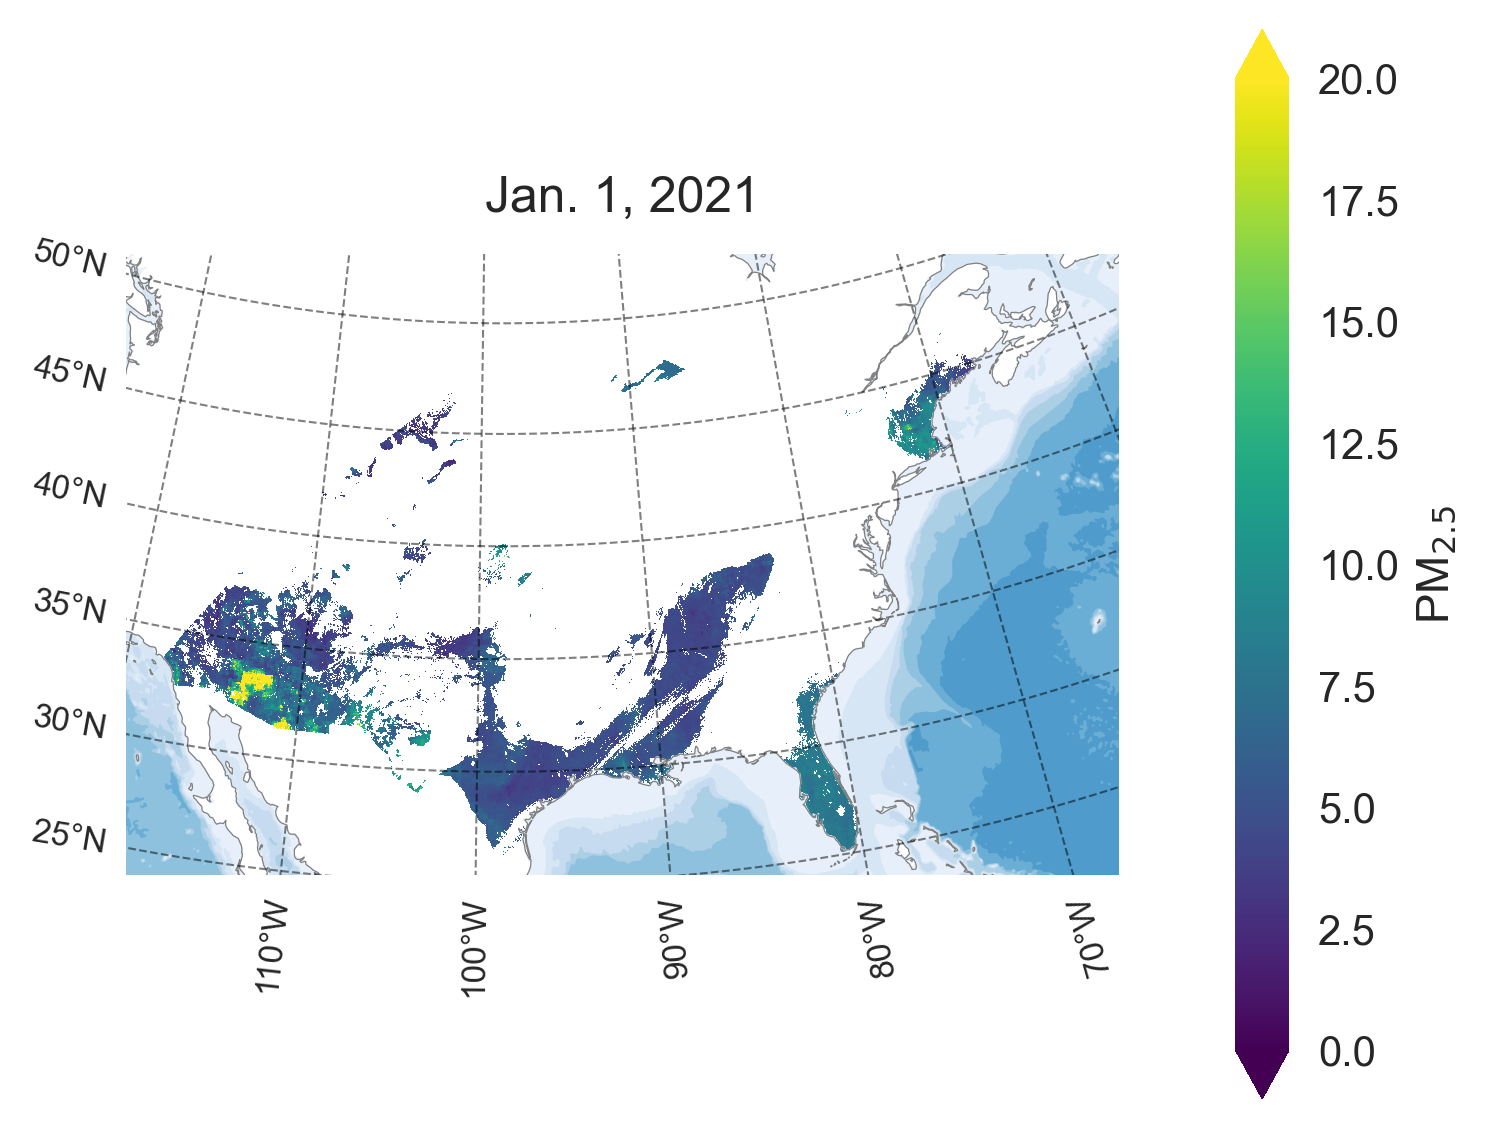

In [118]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(projection=equal_area)

times = ds.t.values
first, times = times[0], times[1:]

mesh = ds['Extra Trees'].sel(t=first) \
    .plot(
        x='x', y='y', 
        vmin=0, vmax=20, 
        cmap='viridis', 
        ax=ax,
        transform = geo,
        add_colorbar=False
)
ax.set_title(pd.to_datetime(first.item()).strftime('%b. %-d, %Y'))
cb = fig.colorbar(mesh,fraction=0.046, pad=0.1, extend='both')
cb.set_label('PM$_{2.5}$')
cb.outline.set_linewidth(0)

ax.spines[:].set_visible(False)

letters = string.ascii_uppercase[:12][::-1]
depth = (list(range(10000, 200, -1000)) + [200, 0])[::-1]

for idx, (letter, depth) in enumerate(zip(letters, depth)):
    ax.add_feature(
        cfeature.NaturalEarthFeature(
            name=f'bathymetry_{letter}_{depth}', scale='10m', category='physical', 
            color=cm.Blues((idx+1) / len(letters)))
    )
    
ax.coastlines(color='gray')
ax.set_extent([-118, -66.5, 25, 50], plate)

gl = ax.gridlines(linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
style = {'size': 8}
gl.xlabel_style = style
gl.ylabel_style = style

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    mesh.set_array(ds['Extra Trees'].sel(t=ds.t.values[frame]).values.flatten())
    ax.set_title(pd.to_datetime(ds.t[frame].item()).strftime('%b. %-d, %Y'))

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=ds.t.values.size,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [10]:
df = ds['Extra Trees'].to_dataframe()

In [11]:
df.describe()

,Extra Trees
count,2.011800e+08
mean,7.841544e+00
std,3.574758e+00
min,0.000000e+00
25%,5.706816e+00
50%,7.313205e+00
75%,9.183200e+00
max,1.753235e+02


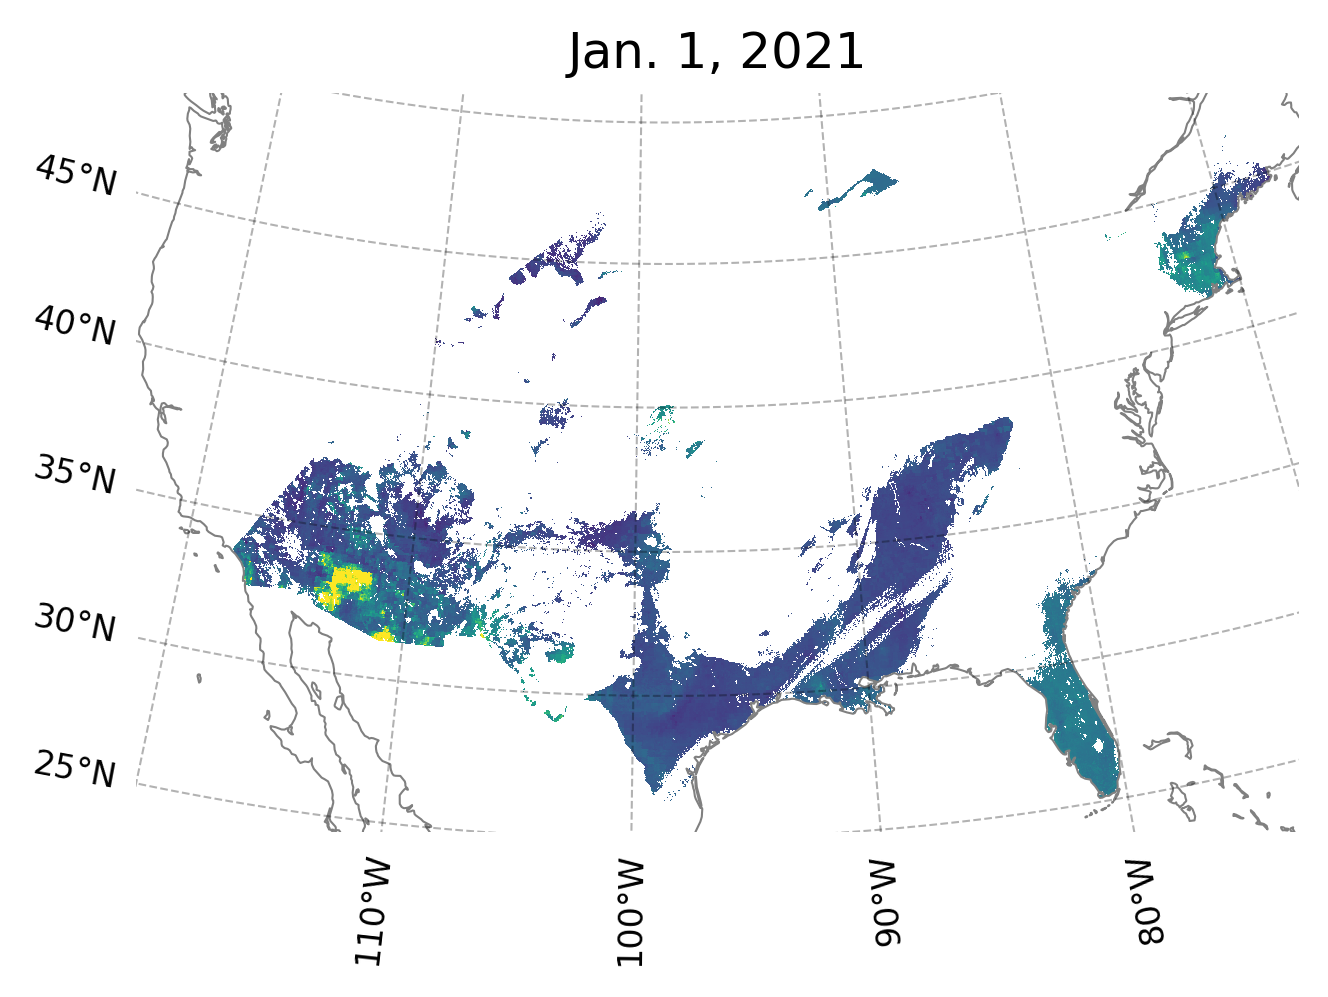

In [16]:
fig = plt.figure(figsize=(5, 5), dpi=300)
ax = fig.add_subplot(projection=equal_area)

times = ds.t.values
first, times = times[0], times[1:]

mesh = ds['Extra Trees'].sel(t=first) \
    .plot(
        x='x', y='y', 
        vmin=0, vmax=20, 
        cmap='viridis', 
        ax=ax,
        transform = proj,
        add_colorbar=False
)

ax.set_title(pd.to_datetime(first.item()).strftime('%b. %-d, %Y'))

# cb = fig.colorbar(mesh,fraction=0.046, pad=0.1, extend='both')
# cb.set_label('PM$_{2.5}$')
# cb.outline.set_linewidth(0)

ax.spines[:].set_visible(False)
    
ax.coastlines(color='gray', lw=0.5)
set_extent(ax, extents['US'])

gl = ax.gridlines(linewidth=0.5, color='black', alpha=0.3, linestyle='--', draw_labels=True)
gl.top_labels = False
gl.right_labels = False
style = {'size': 8}
gl.xlabel_style = style
gl.ylabel_style = style

# Next we need to create a function that updates the values for the colormesh, as well as the title.
def animate(frame):
    mesh.set_array(ds['Extra Trees'].sel(t=ds.t.values[frame]).values.flatten())
    ax.set_title(pd.to_datetime(ds.t[frame].item()).strftime('%b. %-d, %Y'))

# Finally, we use the animation module to create the animation.
ani = animation.FuncAnimation(
    fig,             # figure
    animate,         # name of the function above
    frames=ds.t.values.size,       # Could also be iterable or list
    interval=200     # ms between frames
)

In [ ]:
HTML(ani.to_jshtml())

In [ ]:
ani.save(f'{save_path}/daily-pm25-no-label.mov')